# Linear Regression

![](./pics/linear_non_linear.png)

**Linear Regression** is the process of creating an equation with coefficients to model the linear relationship that is present in the data 

### Examples of Linear Relationships in Real Life.
#### Newtons Second Law  
 $F = ma$
- From this relationship we know that the **Force (F)** will increase as the **Acceleration (a)** increases. This is while asuming that the **Mass (m)** is constant. 
- As there is only one variable which is changing, this will produce a straight line


![](./pics/fma.gif)


- This equation has produced a **model** between **Force** and **Acceleration**
- We can now use this model to make **predictions** 

### Exercise 1 : 
- Using `F = ma` , predict the  `Force (F)` when the `Acceleration (a)` is `100`, given that the `Mass (m) ` is `50` ?

In [2]:
F = 100*50
print(F)

5000


### Regression Modelling 

Here, we are assuming that there is a **Linear Relationship** between 2 variables.  $X$ and $Y$
$$
X \propto Y
$$

This will then produce a straight line equation, such as the one below :

$$
Y = m X + c
$$

$
m = slope 
$

$
C = Y-intercept
$

** There are many alternative for $m$ & $C$ online. Most commonly $\beta_0$ as $C$ and  $\beta_1$ as $m$

### Manual Linear Regression 

Steps: 
1. Plot the data. 
2. Make a straight line which fits most of the points 
3. Calcualte the $slope (m). (Y/X)$
4. Obtain the $Y-intercept (C)$. 


### Example of Manual Linear Regression 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Creating dummy data 
x = [2,3,5,7,9,1,6,6,0,-1,8.5]
y = [2,5,7,9,11,2,7,9,1,0,10]


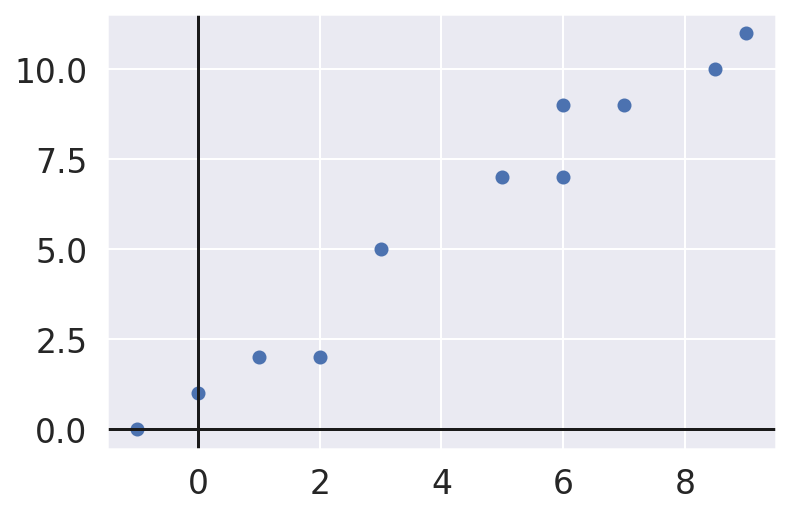

In [3]:
# plotting the points 

plt.scatter(x,y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


In [4]:
# function to get the slope from two points
def getSlope(x1, y1, x2, y2):
    slope = (y2-y1)/(x2-x1)
    return slope



In [5]:
# obotaining the slope from two points in the data 
# (0,1)  & (7,9)
m = getSlope(0,1,7,9)


In [6]:
# The value of the slop

m

1.1428571428571428

In [7]:
1.14*7

7.9799999999999995

In [8]:
# obtaining C 
# y = m x + C 
# C = y -m X
# using point (7,9)

C= 9-m*7
C

1.0

In [9]:
# making new values of y by formula 
y_h= [(i * m)+C  for i in x]

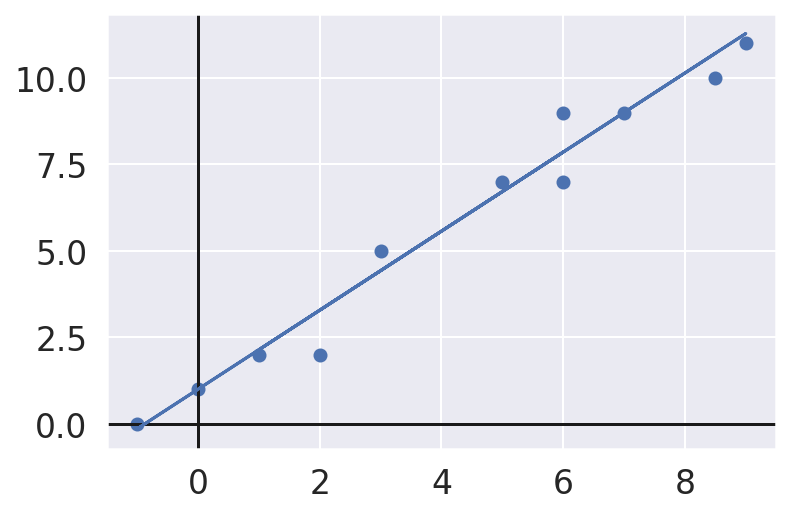

In [10]:

plt.scatter(x,y)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# Plotting line

plt.plot(x,y_h)

plt.show()

### Exercise 2
From the points below, obtain the `slope (m)` as well as the `Y-intercept` and draw a line with them 

In [11]:
x_1 = [4, 6, 10, 14, 18, 2, 12, 12, 0, -2, 17.0]

y_1 = [14, 14, 10, 6, 1, 19, 8, 8, 20, 21, 2.5]



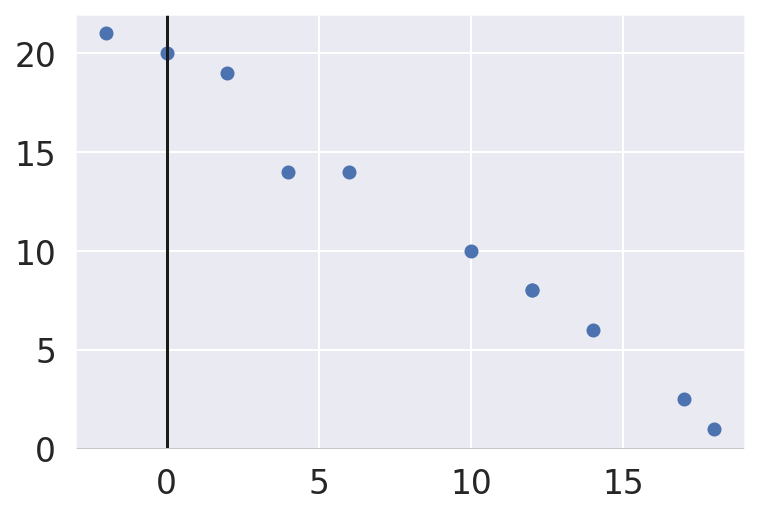

In [12]:

plt.scatter(x_1,y_1)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# Plotting line



plt.show()

In [13]:
# (0,1)  & (7,9)
m_1 = getSlope(6,14,12,8)
m_1

-1.0

In [14]:


C_1= 1-m_1*18

In [15]:
y_h_1= [(i * m_1)+C_1  for i in x_1]
y_h_1

[15.0, 13.0, 9.0, 5.0, 1.0, 17.0, 7.0, 7.0, 19.0, 21.0, 2.0]

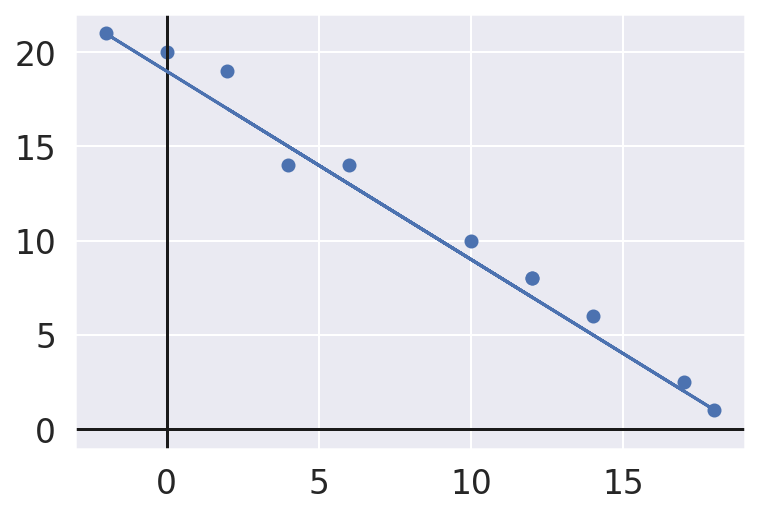

In [16]:
plt.scatter(x_1,y_1)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
# Plotting line

plt.plot(x_1,y_h_1)

plt.show()

# Scikit-Learn (sklearn)

Scikit-learn is an open source library which is frequently used for machine learning. We can import the algorithms and produce models. These models can than be used for predictions. 

In [17]:
# importing function from scikit learn library
from sklearn.linear_model import LinearRegression


In [18]:
# Placing data in a dataframe 
df = pd.DataFrame({'x':x,'y':y})

In [19]:
df

,x,y
0,2.0,2
1,3.0,5
2,5.0,7
3,7.0,9
4,9.0,11
5,1.0,2
6,6.0,7
7,6.0,9
8,0.0,1
9,-1.0,0


### Defining x & Y
- If the data is coming from a pandas DataFrame, the data for `X` cannot be in a `series` format.It has to be in a `DataFrame` format.
- The data for `y` on the other hand, has to be in a `series` format.

In [20]:
X = df[['x']]
y = df['y']

In [21]:
print(type(df['x']))
print(type(df[['x']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
# define the algorithm function
lr = LinearRegression()

In [23]:
# fit or train the function with your data, to produce the model
model = lr.fit(X, y)


In [24]:
## View the intercept and slope from the data

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.9611819235225942
slope: [1.12746234]


In [25]:
# Us the model to make predictions 

prediction = model.predict([[20]])
prediction

array([23.51042874])

In [26]:
# predict y values with the x values
model.predict(df[['x']])

array([ 3.2161066 ,  4.34356895,  6.59849363,  8.85341831, 11.10834299,
        2.08864426,  7.72595597,  7.72595597,  0.96118192, -0.16628042,
       10.54461182])

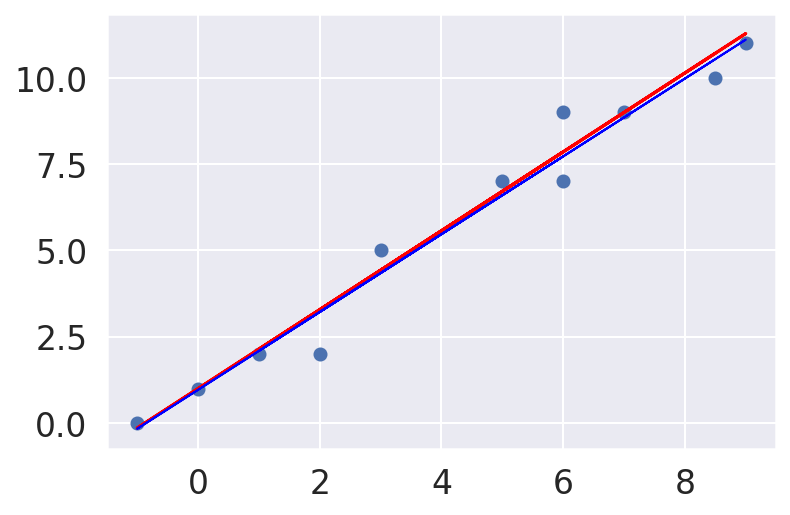

In [27]:

## plotting the values 
plt.scatter(df[['x']],df[['y']])


## Plotting the old line we guessed. 
plt.plot(x,y_h, color = 'red')

## Plotting  the a new line with the predicted values.
plt.plot(df[['x']], model.predict(df[['x']]), color='blue', linewidth=1)

In [30]:
from sklearn.metrics import mean_squared_error



In [31]:
y_predict = model.predict(df[['x']])


In [32]:
mean_squared_error(y,y_predict)

0.4170968081744444

In [33]:
mean_squared_error(y,y_predict, squared= False)

0.6458303246011636

### Exercise 2 
- Use machine learning to obtain the intercept and slope for the values below 
- Use model.predict to obtain new values of y. 
- Plot the new line of the model

In [46]:
x_1 = [4, 6, 10, 14, 18, 2, 12, 12, 0, -2, 17.0]

y_1 = [14, 14, 10, 6, 1, 19, 8, 8, 20, 21, 2.5]

df_1 = pd.DataFrame({'x':x_1,'y':y_1})

X = df_1[['x']]
y = df_1['y']

In [47]:
model_baru = lr.fit(X,y)

In [48]:
print('intercept:', model_baru.intercept_)

print('slope:', model_baru.coef_)

intercept: 19.6981460023175
slope: [-1.00193125]


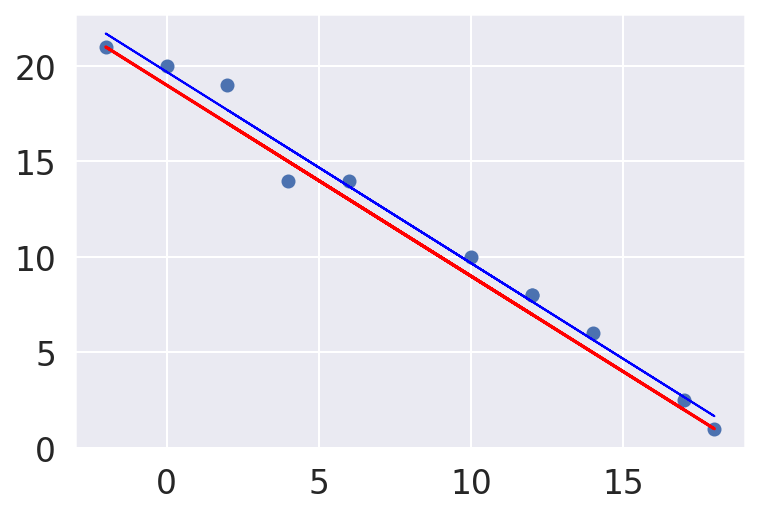

In [50]:
## plotting the values 
plt.scatter(df_1[['x']],df_1[['y']])


## Plotting the old line we guessed. 
plt.plot(x_1,y_h_1, color = 'red')

## Plotting  the a new line with the predicted values.
plt.plot(df_1[['x']], model_baru.predict(df_1[['x']]), color='blue', linewidth=1)

#### References 

- [An Introduction to Linear Regression Analysis (video)](https://www.youtube.com/watch?v=zPG4NjIkCjc&ab_channel=statisticsfun)
- [Linear Regression in python](https://realpython.com/linear-regression-in-python/#:~:text=When%20implementing%20linear%20regression%20of,equation%20is%20the%20regression%20equation.)